In [1]:
#from sklearn.manifold import TSNE
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import utils
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from random import randrange
from sklearn.metrics import plot_confusion_matrix
import sys; sys.path.append('../')
from fast_tsne import fast_tsne

In [2]:
# Fashion MNIST reader
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
x_train, y_train = load_mnist('data\\', kind='train')
x_test, y_test = load_mnist('data\\', kind='t10k')
print('Extraction completed!')

Extraction completed!


In [4]:
print("Data set contains %d samples with %d features" % x_train.shape)

Data set contains 60000 samples with 784 features


In [5]:
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

60000 training samples
10000 test samples


In [6]:
combine_data= np.concatenate([x_train,x_test])

In [7]:
combine_data.shape

(70000, 784)

In [8]:
time_start = time.time()
pca_50 = PCA(n_components=50)
combine_data_train = pca_50.fit_transform(combine_data)
print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 4.51828145980835 seconds
Cumulative variance explained by 50 principal components: 0.8625261610906192


In [9]:
combine_data_train.shape

(70000, 50)

In [10]:
%time embedding_train = fast_tsne(combine_data_train)

Wall time: 1min 5s


In [11]:
embedding_train_60000 = embedding_train[0:60000]
embedding_test = embedding_train[60000:]

In [12]:
label= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
board = []
for i in range(10):
    board.append([])
    for j in range(2):
        board[i].append(0)

def fashion_scatter(x, colors, word = False):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = plt.scatter(x[:,0], x[:,1], lw=0, s=80, c=palette[colors.astype(np.int)],facecolors='none', edgecolors='r')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        #xtext, ytext= np.median(x[colors == i, :], axis=0)
        xtext, ytext= np.median(x[colors == i, :], axis=0)
        if (word):
            txt = ax.text(xtext, ytext, label[i], fontsize=24)
        else:
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        board[i][0] = xtext
        board[i][1] = ytext

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(35.668233776542806, -42.22946375825733, '0'),
  Text(-28.944785055254364, -62.622819979752165, '1'),
  Text(39.536485922613565, 21.308618330977353, '2'),
  Text(5.084647205064947, -36.57804299240846, '3'),
  Text(49.21130327290909, 7.688355097312645, '4'),
  Text(-31.542390447883054, 11.019412159381181, '5'),
  Text(29.1122402995772, 6.306503671332111, '6'),
  Text(-61.16128036371357, -9.859684303643135, '7'),
  Text(-1.4837174659064085, 37.94530898098019, '8'),
  Text(-43.373194114524665, 52.24009658651866, '9')])

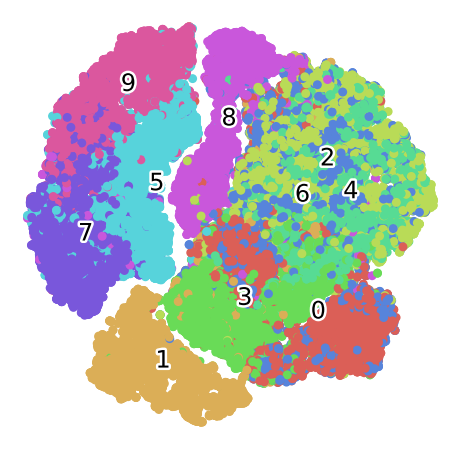

In [13]:
fashion_scatter(embedding_train_60000, y_train, word = False)

In [125]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric="euclidean")
classifier.fit(embedding_train_60000, y_train)
y_pred = classifier.predict(embedding_test)

In [126]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [127]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[822   1  12  32   4   1 114   1  13   0]
 [ 10 955   1  24   5   0   3   0   2   0]
 [ 18   2 758  13 115   0  91   0   3   0]
 [ 47   7  11 865  37   0  30   0   3   0]
 [  4   1 149  39 722   0  81   0   4   0]
 [  0   0   0   0   0 899   1  61   0  39]
 [184   2 140  30 109   0 515   0  20   0]
 [  0   0   0   0   0  38   0 919   0  43]
 [  5   1   9   4   5   1   8   7 959   1]
 [  0   0   0   0   0  16   0  50   1 933]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.70      0.76      0.73      1000
           3       0.86      0.86      0.86      1000
           4       0.72      0.72      0.72      1000
           5       0.94      0.90      0.92      1000
           6       0.61      0.52      0.56      1000
           7       0.89      0.92      0.90      1000
           8       0.95      0.96      0.

Confusion matrix:
[[822   1  12  32   4   1 114   1  13   0]
 [ 10 955   1  24   5   0   3   0   2   0]
 [ 18   2 758  13 115   0  91   0   3   0]
 [ 47   7  11 865  37   0  30   0   3   0]
 [  4   1 149  39 722   0  81   0   4   0]
 [  0   0   0   0   0 899   1  61   0  39]
 [184   2 140  30 109   0 515   0  20   0]
 [  0   0   0   0   0  38   0 919   0  43]
 [  5   1   9   4   5   1   8   7 959   1]
 [  0   0   0   0   0  16   0  50   1 933]]


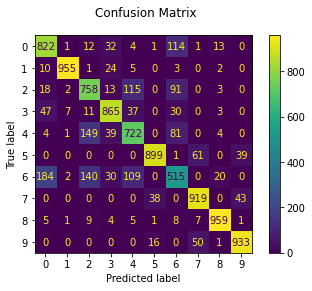

In [129]:
disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [130]:
result_df = pd.DataFrame(columns = ['No_of_points', 'Time_TSNE', 'Accuracy'])
print(result_df)

Empty DataFrame
Columns: [No_of_points, Time_TSNE, Accuracy]
Index: []


In [136]:
for i in range(300):
    if i % 100 == 0:
        print(i)
    number_of_points = randrange(10000)
    # print(randrange(10000))
    time_start = time.time()
    classifier.fit(embedding_train_60000, y_train) 
    y_pred = classifier.predict(embedding_test[0:number_of_points])
    time_end = time.time()-time_start
    result2 = accuracy_score(y_test[0:number_of_points],y_pred)
    result_df = result_df.append({'No_of_points' : number_of_points, 'Time' : time_end, 'Accuracy': result2}, 
                ignore_index = True)

0
100
200


In [137]:
result_df

,No_of_points,Time_TSNE,Accuracy,Time
0,1856.0,NaN,0.833513,0.091031
1,5755.0,NaN,0.831798,0.274634
2,5521.0,NaN,0.834088,0.176229
3,6035.0,NaN,0.831980,0.187503
4,4751.0,NaN,0.835403,0.140622
...,...,...,...,...
595,7631.0,NaN,0.833967,0.225991
596,854.0,NaN,0.844262,0.072004
597,5130.0,NaN,0.834113,0.163031
598,2460.0,NaN,0.840244,0.095006


In [138]:
df_filter = result_df[result_df['Accuracy'] <= 1]

In [139]:
df_filter

,No_of_points,Time_TSNE,Accuracy,Time
0,1856.0,NaN,0.833513,0.091031
1,5755.0,NaN,0.831798,0.274634
2,5521.0,NaN,0.834088,0.176229
3,6035.0,NaN,0.831980,0.187503
4,4751.0,NaN,0.835403,0.140622
...,...,...,...,...
595,7631.0,NaN,0.833967,0.225991
596,854.0,NaN,0.844262,0.072004
597,5130.0,NaN,0.834113,0.163031
598,2460.0,NaN,0.840244,0.095006


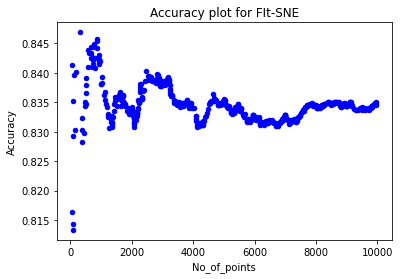

In [142]:
# scatter plot
df_filter.plot(kind = 'scatter',
        x = 'No_of_points',
        y = 'Accuracy',
        color = 'blue')
  
# set the title
plt.title('Accuracy plot for FIt-SNE')
  
# show the plot
plt.show()